<a href="https://colab.research.google.com/github/jiayuankeliang/309CourseWork2/blob/main/309CourseWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import moudle

In [69]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt

load data

In [70]:
path = './data/train'
img_list= []
label_list = []
for label in os.listdir(path):
  for file_name in os.listdir(os.path.join(path, label)):
    img = Image.open(os.path.join(path, label, file_name))
    img = img.resize(size=(128,128))
    img_list.append(np.array(img))
    label_list.append(label)

check shape

In [71]:
X_train = np.array(img_list)
Y_train = np.array(label_list, ndmin=1)
X_train.shape, Y_train.shape

((210, 128, 128, 3), (210,))

show image

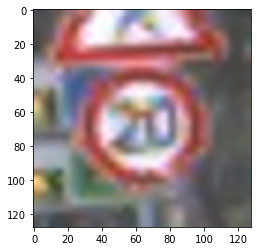

In [72]:
plt.imshow(X_train[0])